In [26]:
from sklearn.cluster import HDBSCAN
from sklearn.preprocessing import MinMaxScaler
import pandas as pd
import umap
import numpy as np
import glasbey
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap
import matplotlib

In [60]:
# 3d plot
def coupled_label_plot(df, umap_plot=True):
    mymap = Basemap(llcrnrlon=df["LONGITUDE"].min(), llcrnrlat=df["LATITUDE"].min(), 
                    urcrnrlon=df["LONGITUDE"].max(), urcrnrlat=df["LATITUDE"].max(), fix_aspect=False)
    
    fig = plt.figure()
    ax = fig.add_subplot(projection='3d')
    ax.scatter(df["LONGITUDE"], df["LATITUDE"], df["LEV_M"], c=df["color"], s=0.5, alpha=1, zorder=4)  # df["predictions"]
    ax.add_collection3d(mymap.drawcoastlines(linewidth=0.5))
    ax.set_box_aspect((np.ptp(df["LONGITUDE"]), np.ptp(df["LATITUDE"]), np.ptp(df["LEV_M"])/50))  # aspect ratio is 1:1:1 in data space
    plt.gca().invert_zaxis()
    plt.show()

    if umap_plot:
        fig = plt.figure()
        ax = fig.add_subplot(projection='3d')
        ax.scatter(df["e0"], df["e1"], df["e2"], c=df["color"], alpha=0.8, zorder=4, s=1)  # , s=s, alpha=1, zorder=4)
        plt.show(block=True)

# On un-imputed time average
Note: UMAP embedding is not possible on data with nan values

In [72]:
# load data 
df_in = pd.DataFrame()
gridded_tables = {}
for filename in glob.glob(f"../ocean_clusters_over_time/data/*_spatial.csv"):
    param = filename.lstrip("../ocean_clusters_over_time/data/").rstrip("_spatial.csv")
    gridded_tables_time[param] = pd.read_csv(filename)
    if df_in.empty:
        df_in = gridded_tables_time[param].copy()
    else:
        df_in = pd.merge(df_in, gridded_tables_time[param], on=["LATITUDE", "LONGITUDE", "LEV_M"], how="outer")

In [73]:
df = df_in[['P_TEMPERATURE', 'P_SALINITY','P_OXYGEN', 'P_NITRATE', 'P_SILICATE', 'P_PHOSPHATE']]

In [75]:
scaler = MinMaxScaler().fit(df)  
df_scaled = scaler.transform(df)

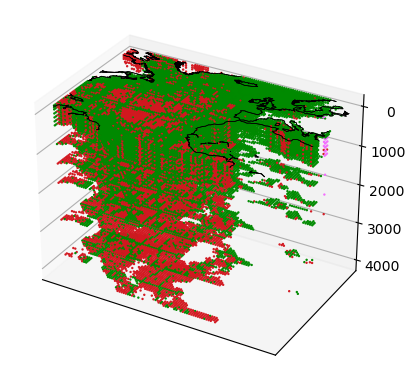

In [76]:
m = HDBSCAN(min_cluster_size=20, min_samples=1, cluster_selection_epsilon=0.2, alpha=1).fit(df_scaled) 
# m = HDBSCAN(min_cluster_size=20).fit(df_scaled) 
# m = HDBSCAN().fit(embedding) 

df_in["label"] = m.labels_

# define good colors for clusters
temp = df_in.copy()

unique_labels = np.sort(np.unique(temp["label"]))
colors = glasbey.create_palette(palette_size=len(unique_labels))
color_map = {label: color for label, color in zip(unique_labels, colors)}
temp["color"] = temp["label"].map(lambda x: color_map[x])
temp.loc[temp["label"] == -1, "color"] = "#000000"  # color noise in black

temp_dropped = temp[temp["label"] != -1]

coupled_label_plot(temp_dropped, umap_plot=False)

# On imputed time average 
(KNN imputed)

In [12]:
df_in = pd.read_csv("data/df_wide_knn.csv")
df = df_in[['P_TEMPERATURE', 'P_SALINITY','P_OXYGEN', 'P_NITRATE', 'P_SILICATE', 'P_PHOSPHATE']]

In [13]:
scaler = MinMaxScaler().fit(df)  
df_scaled = scaler.transform(df)

In [15]:
embedding = umap.UMAP(min_dist=0.0, n_components=3, n_neighbors=20).fit_transform(df_scaled)

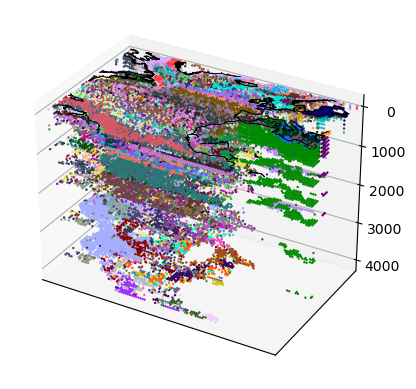

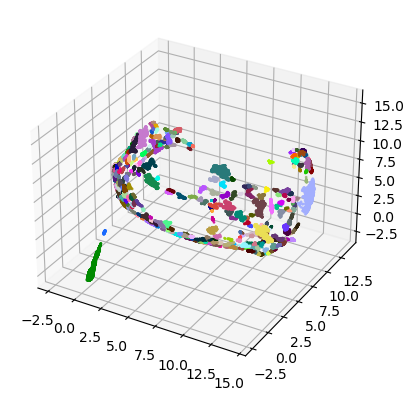

In [34]:
# m = HDBSCAN(min_cluster_size=20, min_samples=1, cluster_selection_epsilon=0.2, alpha=1).fit(embedding) 
m = HDBSCAN(min_cluster_size=20).fit(embedding) 
# m = HDBSCAN().fit(embedding) 

df_in["e0"] = embedding[:, 0]
df_in["e1"] = embedding[:, 1]
df_in["e2"] = embedding[:, 2]
df_in["label"] = m.labels_

# define good colors for clusters
temp = df_in.copy()

unique_labels = np.sort(np.unique(temp["label"]))
colors = glasbey.create_palette(palette_size=len(unique_labels))
color_map = {label: color for label, color in zip(unique_labels, colors)}
temp["color"] = temp["label"].map(lambda x: color_map[x])
temp.loc[temp["label"] == -1, "color"] = "#000000"  # color noise in black

temp_dropped = temp[temp["label"] != -1]

coupled_label_plot(temp_dropped)

# On un-imputed data (3x20 years)
embedding is not possible on this

In [81]:
# load data 
df_in = pd.DataFrame()
gridded_tables_time = {}
for filename in glob.glob(f"../ocean_clusters_over_time/data/*_time_gridded.csv"):
    param = filename.lstrip("../ocean_clusters_over_time/data/").rstrip("_time_gridded.csv")
    gridded_tables_time[param] = pd.read_csv(filename)
    if df_in.empty:
        df_in = gridded_tables_time[param].copy()
    else:
        df_in = pd.merge(df_in, gridded_tables_time[param], on=["LATITUDE", "LONGITUDE", "LEV_M", "DATEANDTIME"], how="outer")

df = df_in[['P_TEMPERATURE', 'P_SALINITY','P_OXYGEN', 'P_NITRATE', 'P_SILICATE', 'P_PHOSPHATE']]

In [82]:
scaler = MinMaxScaler().fit(df)  
df_scaled = scaler.transform(df)

1960-01-01


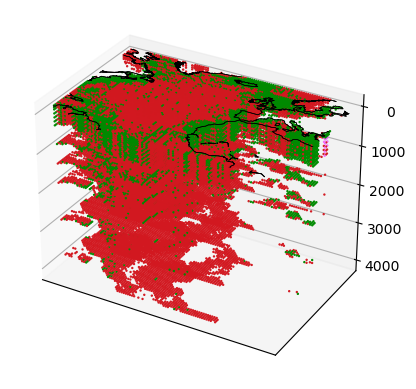

1980-01-01


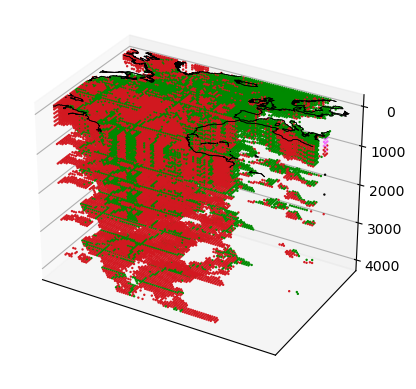

2000-01-01


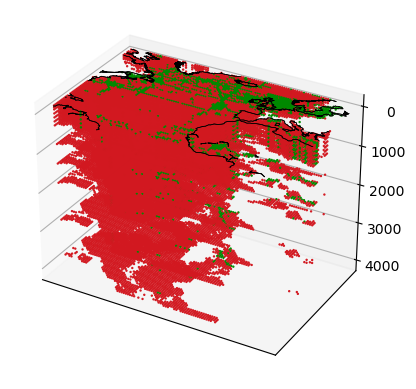

In [87]:
m = HDBSCAN(min_cluster_size=20, min_samples=1, cluster_selection_epsilon=0.2, alpha=1).fit(df_scaled) 
# m = HDBSCAN(min_cluster_size=20).fit(df_scaled) 
# m = HDBSCAN().fit(embedding) 

df_in["label"] = m.labels_

# define good colors for clusters
temp = df_in.copy()
unique_labels = np.sort(np.unique(temp["label"]))
colors = glasbey.create_palette(palette_size=len(unique_labels))
color_map = {label: color for label, color in zip(unique_labels, colors)}
temp["color"] = temp["label"].map(lambda x: color_map[x])
temp.loc[temp["label"] == -1, "color"] = "#000000"  # color noise in black
temp_dropped = temp[temp["label"] != -1]  # drop noise 

# one plot per timestep
for year in temp["DATEANDTIME"].unique():
    df_y = temp[temp["DATEANDTIME"] == year]
    print(year)
    coupled_label_plot(df_y, umap_plot=False)

# On imputed 3x20 years

In [102]:
# load data
df_in = pd.read_csv("../ocean_clusters_over_time/data/df_knn_3x20.csv") 
df_in["LONGITUDE"] = np.arcsin(df_in["LONGITUDE0"])/(2*np.pi)*360*(-1)
df = df_in[['P_SILICATE', 'P_OXYGEN', 'P_PHOSPHATE', 'P_NITRATE', 'P_SALINITY', 'P_TEMPERATURE']]

In [103]:
scaler = MinMaxScaler().fit(df)  
df_scaled = scaler.transform(df)

embedding = umap.UMAP(min_dist=0.0, n_components=3, n_neighbors=20).fit_transform(df_scaled)

1960.0


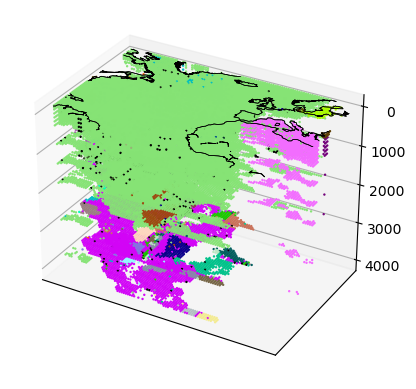

1980.0


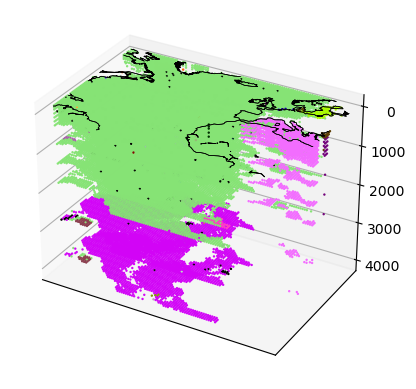

2000.0


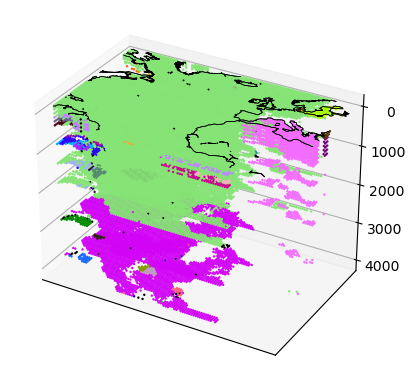

In [108]:
m = HDBSCAN(min_cluster_size=20, min_samples=1, cluster_selection_epsilon=0.15, alpha=1).fit(embedding) 
# m = HDBSCAN(min_cluster_size=20).fit(df_scaled) 
# m = HDBSCAN().fit(embedding) 

df_in["e0"] = embedding[:, 0]
df_in["e1"] = embedding[:, 1]
df_in["e2"] = embedding[:, 2]
df_in["label"] = m.labels_

# define good colors for clusters
temp = df_in.copy()
unique_labels = np.sort(np.unique(temp["label"]))
colors = glasbey.create_palette(palette_size=len(unique_labels))
color_map = {label: color for label, color in zip(unique_labels, colors)}
temp["color"] = temp["label"].map(lambda x: color_map[x])
temp.loc[temp["label"] == -1, "color"] = "#000000"  # color noise in black
temp_dropped = temp[temp["label"] != -1]  # drop noise 

# one plot per timestep
for year in temp["year"].unique():
    df_y = temp[temp["year"] == year]
    print(year)
    coupled_label_plot(df_y, umap_plot=False)